In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
print(tf.__version__)

2.2.0


In [5]:
print(keras.__version__)

2.3.0-tf


In [6]:
(xTrain , yTrain ), (xTest, yTest) = keras.datasets.mnist.load_data()


In [7]:
import numpy as np
np.set_printoptions(linewidth=5000)
xTrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

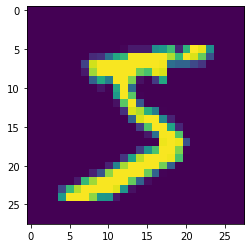

In [9]:
plt.imshow(xTrain[0])

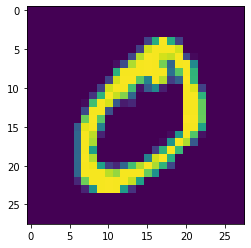

In [10]:
plt.imshow(xTrain[1])

In [11]:
print(yTrain[0])
print(yTrain[1])


5
0


In [12]:
xTrain = xTrain / 255.0
xTest = xTest/255.0

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [14]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=10,activation="softmax"))

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [16]:
xTrain.shape


(60000, 28, 28)

In [17]:
model.compile(optimizer=tf.optimizers.Adam(),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [18]:
xTest.shape

(10000, 28, 28)

In [21]:
%%time
model.fit(xTrain,yTrain,epochs=10, validation_data=(xTest,yTest))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0101 - accuracy: 0.9968 - val_loss: 0.0854 - val_accuracy: 0.9787
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.0901 - val_accuracy: 0.9796
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.0978 - val_accuracy: 0.9775
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.1105 - val_accuracy: 0.9777
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0076 - accuracy: 0.9973 - val_loss: 0.1076 - val_accuracy: 0.9779
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0071 - accuracy: 0.9974 - val_loss: 0.0864 - val_accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0989 - val_accuracy:

In [23]:
h=model.history.history

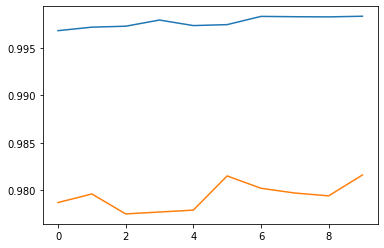

In [24]:
plt.plot(h["accuracy"])
plt.plot(h["val_accuracy"])